In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import idx2numpy as idx2np
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load IDX files
train_images = idx2np.convert_from_file("../data/mnist-dataset/train-images.idx3-ubyte")
train_labels = idx2np.convert_from_file("../data/mnist-dataset/train-labels.idx1-ubyte")
test_images  = idx2np.convert_from_file("../data/mnist-dataset/t10k-images.idx3-ubyte")
test_labels  = idx2np.convert_from_file("../data/mnist-dataset/t10k-labels.idx1-ubyte")

# Flatten and normalize
X_train = train_images.reshape((train_images.shape[0], -1)) / 255.0
X_test = test_images.reshape((test_images.shape[0], -1)) / 255.0
y_train = train_labels
y_test = test_labels

In [4]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [5]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9692

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



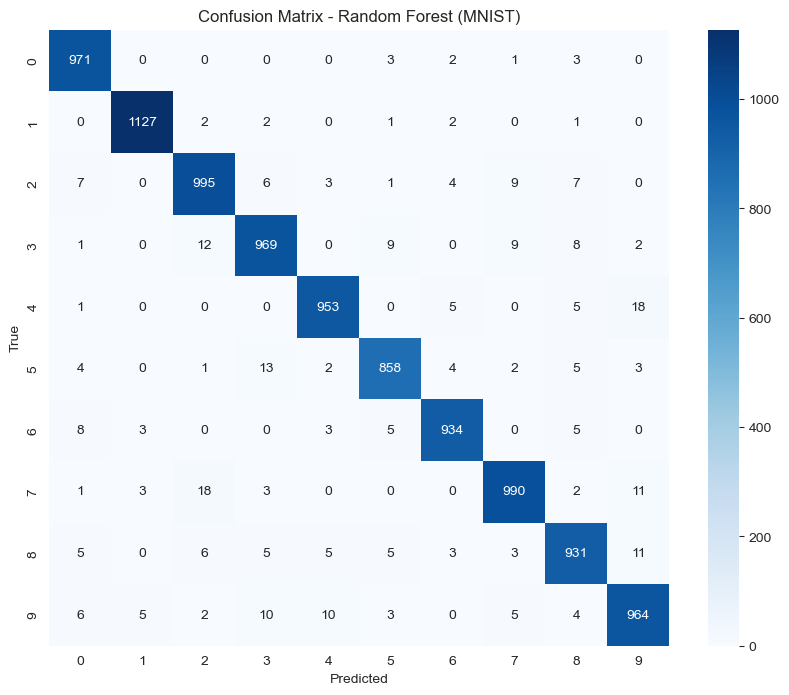

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest (MNIST)")
plt.show()